In [72]:
# This program compute the minimal GKZ vector associated to a point-configuration
# using secondary_polytope() in Sagemath and symbolic minimize in Mathematica
# input: point-configuration A
# output: fraction minimal GKZ vector

In [73]:
reset()

# 设P=conv(V)，生成 kP 中的整点，记为 A
V = [[0,0], [1,0], [2,0], [1,1], [0,1]]  # P的顶点集
k = 2  
kV = [[k*x for x in point] for point in V]
kP = Polyhedron(kV)
A = kP.integral_points()  # 找到放大多面体中的整点
# Pk = [tuple(p / k for p in point) for point in kPk] 

# 将元组转换为列表
A = list(A)  
A = [list(point) for point in A]  # 将每个点的坐标也转换为列表
print(A)

In [74]:
A = [[0,0], [1,0], [2,0], [1,1], [0,1]] # point-configuration

# mather example [4,0,0], [0,4,0], [0,0,4], [2,1,1], [1,2,1], [1,1,2]
# Naoto's five points [0,0], [1,0], [2,0], [1,1], [0,1]
# skew four points [0,0], [1,2], [2,1], [17,9]
# [1,0], [9,0], [24,7], [3,3], [0,1]
# Yotsutani-Zhou C2 [0,-1,1], [2,-1,-1], [2,0,-1], [0,0,1], [-1,3,-1], [-1,1,1], [-1,-1,-1], [-1,-1,1]
Ap = PointConfiguration(A)
Q = Polyhedron(A)
N = len(A) # 点的个数
n = len(A[0]) # 维数
f = len(Q.faces(n-1))
v = Q.n_vertices()

In [75]:
print("A中点的个数:", N)


A中点的个数: 5


In [76]:
print("Q=conv(A)的面数:", f)

Q=conv(A)的面数: 4


In [77]:
print("Q=conv(A)的顶点数:", v)

Q=conv(A)的顶点数: 4


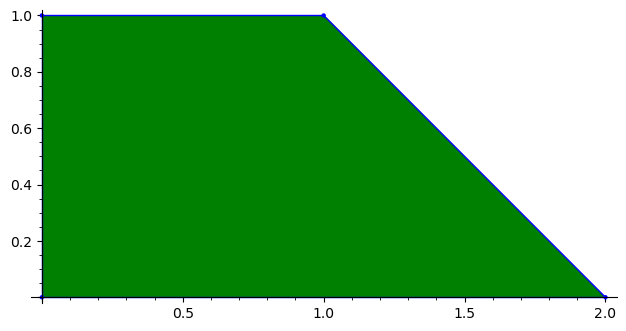

In [78]:
Q.show(aspect_ratio=1, axes=True)

In [79]:
SP = Ap.secondary_polytope()

In [80]:
# SP.Vrepresentation()
# SP.Hrepresentation()  # 其中含有 n+1 个等式约束

In [81]:
# 将 SP 的约束改写成 Mathematica 的格式存入文件
# 从 SP.Hrepresentation() 获取等式约束
equations = []
for ineq in SP.Hrepresentation():
    if isinstance(ineq, sage.geometry.polyhedron.representation.Equation):
        # 获取系数并转换为列表
        coeffs = list(ineq.vector())
        equations.append(coeffs)

# 格式化输出字符串
output = "{"
for i, eq in enumerate(equations):
    output += "{" + ", ".join(map(str, eq)) + "}"
    if i < len(equations)-1:
        output += ", "
output += "}"

# 将等式约束写入文件 equations.txt
with open('equations.txt', 'w') as f:
    f.write(output)


# 从 SP.Hrepresentation() 获取不等式约束
inequalities = []
for ineq in SP.Hrepresentation():
    if isinstance(ineq, sage.geometry.polyhedron.representation.Inequality):
        # 获取系数并转换为列表
        coeffs = list(ineq.vector())
        inequalities.append(coeffs)

# 格式化输出字符串
output = "{"
for i, ineq in enumerate(inequalities):
    output += "{" + ", ".join(map(str, ineq)) + "}"
    if i < len(inequalities)-1:
        output += ", "
output += "}"

# 将不等式约束写入文件 inequations.txt
with open('inequalities.txt', 'w') as f:
    f.write(output)


In [82]:
# input the output ofMathematica 
mGKZ = [5/3, 5/3, 5/3, 2, 2]

In [83]:
# 计算 mGKZ 的 lower convex envelop
liftA = [a + [b] for a, b in zip(A, mGKZ)]
liftQ = Polyhedron(liftA)
HLQ = liftQ.Hrepresentation()
lowHLQ = [ineq for ineq in HLQ if ineq[n+1] > 0]
HLQ

(An equation (0, 1, -3) x + 5 == 0,
 An inequality (0, 0, 3) x - 5 >= 0,
 An inequality (0, 0, -1) x + 2 >= 0,
 An inequality (1, 0, 0) x + 0 >= 0,
 An inequality (-1, 0, -3) x + 7 >= 0)

In [84]:
F1 = liftQ.plot(axes=True)
F2 = point3d(liftA, color='red', size=30)
F3 = F1 + F2

# 显示结果
F3.show()

Graphics3d Object